# Lab5
Sicheng Mao

## part1

In [21]:
"""
Deep Learning on Graphs - ALTEGRAD - Nov 2022
"""

import numpy as np
from random import randint, choice
from gensim.models import Word2Vec
import networkx as nx
from tqdm import tqdm

In [32]:
############## Task 1
# Simulates a random walk of length "walk_length" starting from node "node"
def random_walk(G, node, walk_length):
    ##################
    walk = []
    for i in range(walk_length):
        node = choice(list(G.neighbors(node)))
        walk.append(node)
    ##################
    walk = [str(node) for node in walk]
    return walk

In [33]:
############## Task 2
# Runs "num_walks" random walks from each node
def generate_walks(G, num_walks, walk_length):
    walks = []

    ##################
    for node in tqdm(np.random.permutation(G.nodes())):
        for i in range(num_walks):
            walks.append(random_walk(G,node,walk_length))
    ##################

    return walks

In [34]:
# Simulates walks and uses the Skipgram model to learn node representations
def deepwalk(G, num_walks, walk_length, n_dim):
    print("Generating walks")
    walks = generate_walks(G, num_walks, walk_length)

    print("Training word2vec")
    model = Word2Vec(vector_size=n_dim, window=8, min_count=0, sg=1, workers=8, hs=1)
    model.build_vocab(walks)
    model.train(walks, total_examples=model.corpus_count, epochs=5)

    return model

In [35]:
# import networkx as nx
# import numpy as np
# from deepwalk import deepwalk
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [36]:
# Loads the web graph
# G = nx.read_weighted_edgelist('../data/web_sample.edgelist', delimiter=' ', create_using=nx.Graph())
G = nx.read_weighted_edgelist('./data/web_sample.edgelist', delimiter=' ', create_using=nx.Graph())
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 33226
Number of edges: 354529


In [38]:
############## Task 3
# Extracts a set of random walks from the web graph and feeds them to the Skipgram model
n_dim = 128
n_walks = 10
walk_length = 20

##################
model = deepwalk(G, num_walks=10, walk_length=20, n_dim=128)
##################

  0%|          | 29/33226 [00:00<01:56, 284.93it/s]

Generating walks


100%|██████████| 33226/33226 [01:47<00:00, 308.49it/s]


Training word2vec


just in case

In [39]:
model.save('w2v.model')

In [27]:
# 100 most frequent nodes
model.wv.index_to_key[:100]

['https://twitter.com',
 'https://www.youtube.com',
 'https://www.linkedin.com',
 'https://plus.google.com',
 'https://fr.wikipedia.org',
 'http://twitter.com',
 'http://www.slate.fr',
 'https://play.google.com',
 'https://itunes.apple.com',
 'http://www.youtube.com',
 'https://www.google.com',
 'https://www.pinterest.com',
 'https://en.wikipedia.org',
 'https://www.service-public.fr',
 'https://lesmoutonsenrages.fr',
 'https://support.google.com',
 'http://www.linkedin.com',
 'https://www.google.fr',
 'http://www.ac-versailles.fr',
 'http://pinterest.com',
 'http://www.culture.gouv.fr',
 'https://www.letudiant.fr',
 'https://www.cnil.fr',
 'https://www.meta-media.fr',
 'https://vimeo.com',
 'http://www.cnrs.fr',
 'https://www.huffingtonpost.fr',
 'https://www.irdes.fr',
 'https://www.reduc.fr',
 'https://www.cnetfrance.fr',
 'https://www.liberation.fr',
 'http://www.epi.asso.fr',
 'https://www.latribune.fr',
 'https://www.legifrance.gouv.fr',
 'https://docs.google.com',
 'https://www.

In [30]:
node = model.wv.index_to_key[:100]
model.wv[node].shape

(100, 128)

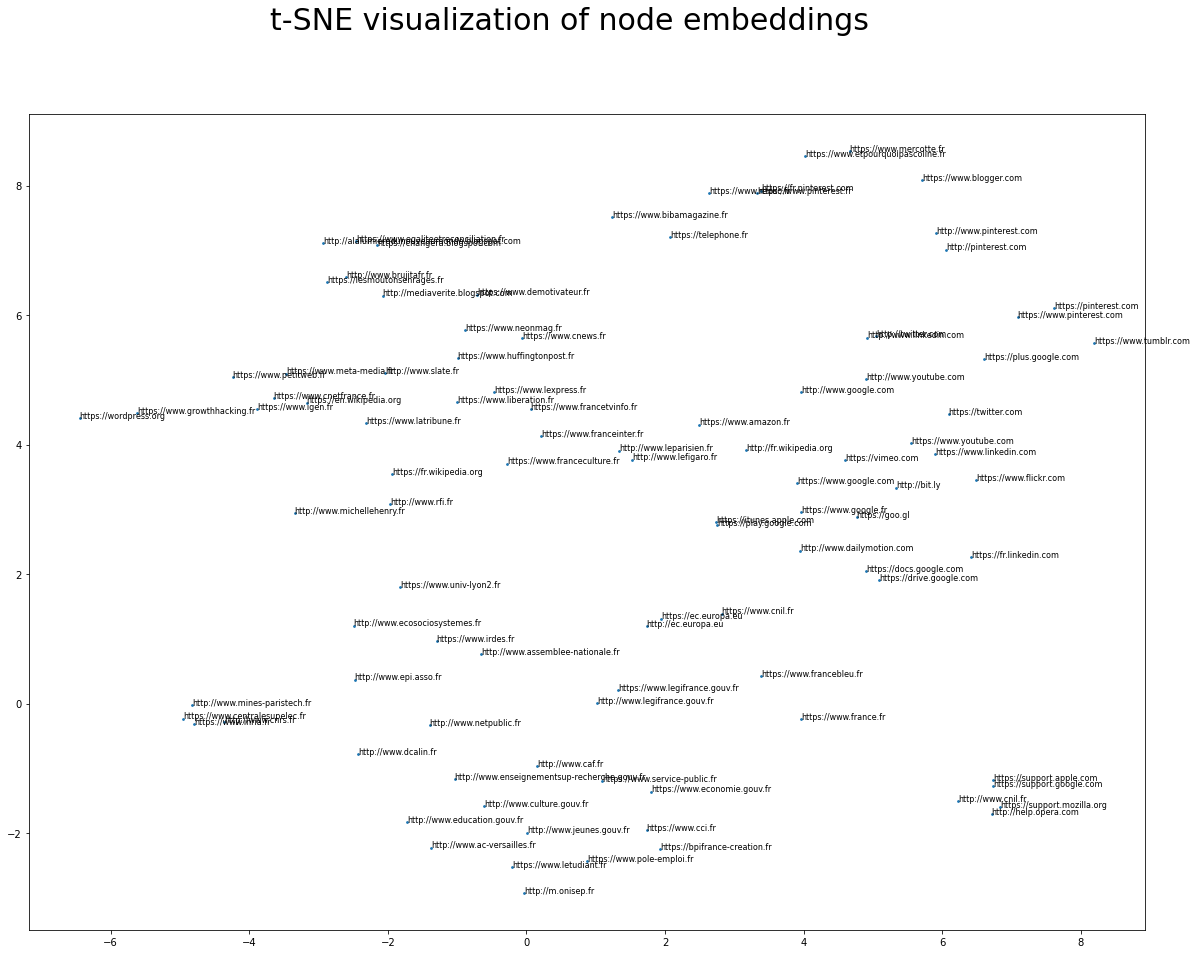

In [40]:
############## Task 4
# Visualizes the representations of the 100 nodes that appear most frequently in the generated walks
def visualize(model, n, dim):

    nodes = model.wv.index_to_key[:n]
    DeepWalk_embeddings = np.empty(shape=(n, dim))
    
    ##################
    DeepWalk_embeddings = model.wv[nodes]
    ##################


    my_pca = PCA(n_components=10)
    my_tsne = TSNE(n_components=2)

    vecs_pca = my_pca.fit_transform(DeepWalk_embeddings)
    vecs_tsne = my_tsne.fit_transform(vecs_pca)

    fig, ax = plt.subplots()
    ax.scatter(vecs_tsne[:,0], vecs_tsne[:,1],s=3)
    for x, y, node in zip(vecs_tsne[:,0] , vecs_tsne[:,1], nodes):     
        ax.annotate(node, xy=(x, y), size=8)
    fig.suptitle('t-SNE visualization of node embeddings',fontsize=30)
    fig.set_size_inches(20,15)
    plt.savefig('embeddings.pdf')  
    plt.show()


visualize(model, 100, n_dim)

In [41]:
# import networkx as nx
# import numpy as np
from scipy.sparse.linalg import eigs
from scipy.sparse import diags, eye

from sklearn.linear_model import LogisticRegression
from sklearn.manifold import SpectralEmbedding
from sklearn.metrics import accuracy_score
# from deepwalk import deepwalk

In [43]:
# Loads the karate network
# G = nx.read_weighted_edgelist('../data/karate.edgelist', delimiter=' ', nodetype=int, create_using=nx.Graph())
G = nx.read_weighted_edgelist('./data/karate.edgelist', delimiter=' ', nodetype=int, create_using=nx.Graph())
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

n = G.number_of_nodes()

# Loads the class labels
# class_labels = np.loadtxt('../data/karate_labels.txt', delimiter=',', dtype=np.int32)
class_labels = np.loadtxt('./data/karate_labels.txt', delimiter=',', dtype=np.int32)
idx_to_class_label = dict()
for i in range(class_labels.shape[0]):
    idx_to_class_label[class_labels[i,0]] = class_labels[i,1]

y = list()
for node in G.nodes():
    y.append(idx_to_class_label[node])

y = np.array(y)

Number of nodes: 34
Number of edges: 78


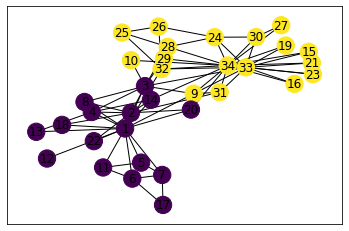

In [45]:
############## Task 5
# Visualizes the karate network

##################
nx.draw_networkx(G, node_color=y)
##################

In [46]:
############## Task 6
# Extracts a set of random walks from the karate network and feeds them to the Skipgram model
n_dim = 128
n_walks = 10
walk_length = 20
model = deepwalk(G, n_walks, walk_length, n_dim)

100%|██████████| 34/34 [00:00<00:00, 3388.69it/s]

Generating walks
Training word2vec


In [47]:
embeddings = np.zeros((n, n_dim))
for i, node in enumerate(G.nodes()):
    embeddings[i,:] = model.wv[str(node)]

idx = np.random.RandomState(seed=42).permutation(n)
idx_train = idx[:int(0.8*n)]
idx_test = idx[int(0.8*n):]

X_train = embeddings[idx_train,:]
X_test = embeddings[idx_test,:]

y_train = y[idx_train]
y_test = y[idx_test]

In [50]:
X_train.shape

(27, 128)

In [51]:
y_train.shape

(27,)

In [61]:
############## Task 7
# Trains a logistic regression classifier and use it to make predictions


##################
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)
##################

1.0

In [63]:
############## Task 8
# Generates spectral embeddings

se = SpectralEmbedding(affinity='precomputed', n_components=2)
embeddings = se.fit_transform(nx.to_numpy_matrix(G))

X_train = embeddings[idx_train,:]
X_test = embeddings[idx_test,:]

y_train = y[idx_train]
y_test = y[idx_test]

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.42857142857142855

## part2

### util.py

In [45]:
import scipy.sparse as sp
import numpy as np
import torch
from sklearn.preprocessing import LabelEncoder

def normalize_adjacency(A):
    ############## Task 9

    ##################
    A_tilde = A + sp.identity(A.shape[0])
    D_tilde_minus_half = sp.diags(1 / np.sqrt(np.asarray(A_tilde.sum(axis=1)).reshape(-1)))
    A_normalized = D_tilde_minus_half @ A_tilde @ D_tilde_minus_half 
    ##################
    
    return A_normalized


def load_cora():
    # idx_features_labels = np.genfromtxt("../data/cora.content", dtype=np.dtype(str))
    idx_features_labels = np.genfromtxt("./data/cora.content", dtype=np.dtype(str))
    features = sp.csr_matrix(idx_features_labels[:, 1:-1], dtype=np.float32)
    features = features.todense()
    features /= features.sum(1).reshape(-1, 1)
    
    class_labels = idx_features_labels[:, -1]
    le = LabelEncoder()
    class_labels = le.fit_transform(class_labels)

    # build graph
    idx = np.array(idx_features_labels[:, 0], dtype=np.int32)
    idx_map = {j: i for i, j in enumerate(idx)}
    # edges_unordered = np.genfromtxt("../data/cora.cites", dtype=np.int32)
    edges_unordered = np.genfromtxt("./data/cora.cites", dtype=np.int32)
    edges = np.array(list(map(idx_map.get, edges_unordered.flatten())), dtype=np.int32).reshape(edges_unordered.shape)
    adj = sp.coo_matrix((np.ones(edges.shape[0]), (edges[:, 0], edges[:, 1])), shape=(class_labels.size, class_labels.size), dtype=np.float32)

    # build symmetric adjacency matrix
    adj = adj + adj.T.multiply(adj.T > adj) - adj.multiply(adj.T > adj)

    print('Dataset has {} nodes, {} edges, {} features.'.format(adj.shape[0], edges.shape[0], features.shape[1]))

    return features, adj, class_labels


def sparse_to_torch_sparse(M):
    """Converts a sparse SciPy matrix to a sparse PyTorch tensor"""
    M = M.tocoo().astype(np.float32)
    indices = torch.from_numpy(np.vstack((M.row, M.col)).astype(np.int64))
    values = torch.from_numpy(M.data)
    shape = torch.Size(M.shape)
    return torch.sparse.FloatTensor(indices, values, shape)

In [2]:
# test nornormalize_adjacency
n = 5
R = sp.random(n,n,0.25)
S = R - sp.diags(R.diagonal())
A = S @ S.T
A_normalized = normalize_adjacency(A)

In [3]:
A.toarray(), A_normalized.toarray()

(array([[0.01444383, 0.        , 0.        , 0.        , 0.07964343],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.07964343, 0.        , 0.        , 0.        , 0.51700201]]),
 array([[0.9272056 , 0.        , 0.        , 0.        , 0.06025869],
        [0.        , 1.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 1.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 1.        , 0.        ],
        [0.06025869, 0.        , 0.        , 0.        , 0.95011828]]))

In [4]:
A.sum(axis=1)

matrix([[0.09408725],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.59664544]])

In [5]:
A_normalized.sum(axis=1)

matrix([[0.98746429],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.01037697]])

### model.py

In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class GNN(nn.Module):
    """Simple GNN model"""
    def __init__(self, n_feat, n_hidden_1, n_hidden_2, n_class, dropout):
        super(GNN, self).__init__()

        self.fc1 = nn.Linear(n_feat, n_hidden_1)
        self.fc2 = nn.Linear(n_hidden_1, n_hidden_2)
        self.fc3 = nn.Linear(n_hidden_2, n_class)
        self.dropout = nn.Dropout(dropout)
        self.relu = nn.ReLU()

    def forward(self, x_in, adj):
        ############## Tasks 10 and 13
        
        ##################
        x = self.relu(adj @ self.fc1(x_in))
        x = self.dropout(x)
        x = self.relu(adj @ self.fc2(x))
        Z1 = x
        x = self.fc3(x)
        ##################
        return F.log_softmax(x, dim=1) , Z1

### gnn_karate.py

In [42]:
# import numpy as np
import networkx as nx
import time
import torch
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

# from utils import normalize_adjacency, sparse_to_torch_sparse
# from models import GNN


# Initialize device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Hyperparameters
epochs = 100
n_hidden_1 = 8
n_hidden_2 = 16
learning_rate = 0.01
dropout_rate = 0.1

# Loads the karate network
# G = nx.read_weighted_edgelist('../data/karate.edgelist', delimiter=' ', nodetype=int, create_using=nx.Graph())
G = nx.read_weighted_edgelist('./data/karate.edgelist', delimiter=' ', nodetype=int, create_using=nx.Graph())
print(G.number_of_nodes())
print(G.number_of_edges())

n = G.number_of_nodes()

# Loads the class labels
# class_labels = np.loadtxt('../data/karate_labels.txt', delimiter=',', dtype=np.int32)
class_labels = np.loadtxt('./data/karate_labels.txt', delimiter=',', dtype=np.int32)
idx_to_class_label = dict()
for i in range(class_labels.shape[0]):
    idx_to_class_label[class_labels[i,0]] = class_labels[i,1]

y = list()
for node in G.nodes():
    y.append(idx_to_class_label[node])

y = np.array(y)
n_class = 2

adj = nx.adjacency_matrix(G) # Obtains the adjacency matrix
adj = normalize_adjacency(adj) # Normalizes the adjacency matrix

############## Task 12
# Set the feature of all nodes to the same value
# features = np.eye(n) # Generates node features
features = np.ones((n,n))


# Yields indices to split data into training and test sets
idx = np.random.RandomState(seed=42).permutation(n)
idx_train = idx[:int(0.8*n)]
idx_test = idx[int(0.8*n):]

# Transforms the numpy matrices/vectors to torch tensors
features = torch.FloatTensor(features).to(device)
y = torch.LongTensor(y).to(device)
adj = sparse_to_torch_sparse(adj).to(device)
idx_train = torch.LongTensor(idx_train).to(device)
idx_test = torch.LongTensor(idx_test).to(device)



# Creates the model and specifies the optimizer
model = GNN(features.shape[1], n_hidden_1, n_hidden_2, n_class, dropout_rate).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

def train(epoch):
    t = time.time()
    model.train()
    optimizer.zero_grad()
    output, _ = model(features, adj)
    loss_train = F.nll_loss(output[idx_train], y[idx_train])
    acc_train = accuracy_score(torch.argmax(output[idx_train], dim=1).detach().cpu().numpy(), y[idx_train].cpu().numpy())
    loss_train.backward()
    optimizer.step()

    print('Epoch: {:03d}'.format(epoch+1),
          'loss_train: {:.4f}'.format(loss_train.item()),
          'acc_train: {:.4f}'.format(acc_train),
          'time: {:.4f}s'.format(time.time() - t))


def test():
    model.eval()
    output, _ = model(features, adj)
    loss_test = F.nll_loss(output[idx_test], y[idx_test])
    acc_test = accuracy_score(torch.argmax(output[idx_test], dim=1).detach().cpu().numpy(), y[idx_test].cpu().numpy())
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()),
          "accuracy= {:.4f}".format(acc_test))


# Train model
t_total = time.time()
for epoch in range(epochs):
    train(epoch)
print("Optimization Finished!")
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))
print()

# Testing
test()

34
78
Epoch: 001 loss_train: 0.6932 acc_train: 0.5556 time: 0.0055s
Epoch: 002 loss_train: 0.6929 acc_train: 0.5556 time: 0.0062s
Epoch: 003 loss_train: 0.6925 acc_train: 0.5556 time: 0.0072s
Epoch: 004 loss_train: 0.6905 acc_train: 0.5556 time: 0.0057s
Epoch: 005 loss_train: 0.6900 acc_train: 0.5556 time: 0.0068s
Epoch: 006 loss_train: 0.6892 acc_train: 0.5556 time: 0.0047s
Epoch: 007 loss_train: 0.6887 acc_train: 0.5556 time: 0.0026s
Epoch: 008 loss_train: 0.6880 acc_train: 0.5556 time: 0.0019s
Epoch: 009 loss_train: 0.6878 acc_train: 0.5556 time: 0.0023s
Epoch: 010 loss_train: 0.6864 acc_train: 0.5556 time: 0.0030s
Epoch: 011 loss_train: 0.6860 acc_train: 0.5556 time: 0.0025s
Epoch: 012 loss_train: 0.6876 acc_train: 0.5556 time: 0.0020s
Epoch: 013 loss_train: 0.6805 acc_train: 0.5926 time: 0.0023s
Epoch: 014 loss_train: 0.6881 acc_train: 0.5556 time: 0.0017s
Epoch: 015 loss_train: 0.6807 acc_train: 0.5926 time: 0.0017s
Epoch: 016 loss_train: 0.6895 acc_train: 0.6296 time: 0.0020s
Ep

### Question 4 

In [13]:
A_k4 = np.ones((4,4)) - np.eye(4)
A_s4 = np.zeros((4,4))
A_s4[:,0] = np.array([0,1,1,1])
A_s4[0,:] = np.array([0,1,1,1])
A_k4, A_s4

(array([[0., 1., 1., 1.],
        [1., 0., 1., 1.],
        [1., 1., 0., 1.],
        [1., 1., 1., 0.]]),
 array([[0., 1., 1., 1.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]]))

In [14]:
A_k4_normalized = normalize_adjacency(A_k4)
A_s4_normalized = normalize_adjacency(A_s4)
A_k4_normalized, A_s4_normalized

(matrix([[0.25, 0.25, 0.25, 0.25],
         [0.25, 0.25, 0.25, 0.25],
         [0.25, 0.25, 0.25, 0.25],
         [0.25, 0.25, 0.25, 0.25]]),
 matrix([[0.25      , 0.35355339, 0.35355339, 0.35355339],
         [0.35355339, 0.5       , 0.        , 0.        ],
         [0.35355339, 0.        , 0.5       , 0.        ],
         [0.35355339, 0.        , 0.        , 0.5       ]]))

In [33]:
def activation(A_normalized, X = torch.ones((4,1))):
    W0 = torch.Tensor([[-0.8, 0.5]])
    W1 = torch.Tensor([[-0.1,0.3, -0.05],[-0.4, 0.6, 0.5]])
    Z0 = F.relu(A_normalized @ X @ W0)
    Z1 = F.relu(A_normalized @ Z0 @ W1)
    return Z1

In [34]:
activation(torch.Tensor(A_k4_normalized)), activation(torch.Tensor(A_s4_normalized))

(tensor([[0.0000, 0.3000, 0.2500],
         [0.0000, 0.3000, 0.2500],
         [0.0000, 0.3000, 0.2500],
         [0.0000, 0.3000, 0.2500]]),
 tensor([[0.0000, 0.3699, 0.3082],
         [0.0000, 0.2670, 0.2225],
         [0.0000, 0.2670, 0.2225],
         [0.0000, 0.2670, 0.2225]]))

In [38]:
activation(torch.Tensor(A_k4_normalized), torch.rand((4,1))), activation(torch.Tensor(A_s4_normalized), torch.rand((4,1)))

(tensor([[0.0000, 0.1392, 0.1160],
         [0.0000, 0.1392, 0.1160],
         [0.0000, 0.1392, 0.1160],
         [0.0000, 0.1392, 0.1160]]),
 tensor([[0.0000, 0.2196, 0.1830],
         [0.0000, 0.1836, 0.1530],
         [0.0000, 0.1393, 0.1161],
         [0.0000, 0.1736, 0.1447]]))

### gnn_cora.py

In [46]:
import numpy as np
import time
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE

# from utils import load_cora, normalize_adjacency, sparse_to_torch_sparse
# from models import GNN

# Initialize device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Hyperparameters
epochs = 100
n_hidden_1 = 64
n_hidden_2 = 32
learning_rate = 0.01
dropout_rate = 0.5

# Read data
features, adj, class_labels = load_cora()
n = adj.shape[0] # Number of nodes
n_class = np.unique(class_labels).size # Number of classes

adj = normalize_adjacency(adj) # Normalize adjacency matrix

# Yields indices to split data into training, validation and test sets
idx = np.random.permutation(n)
idx_train = idx[:int(0.6*n)]
idx_val = idx[int(0.6*n):int(0.8*n)]
idx_test = idx[int(0.8*n):]

# Transform the numpy matrices/vectors to torch tensors
features = torch.FloatTensor(features).to(device)
y = torch.LongTensor(class_labels).to(device)
adj = sparse_to_torch_sparse(adj).to(device)
idx_train = torch.LongTensor(idx_train).to(device)
idx_val = torch.LongTensor(idx_val).to(device)
idx_test = torch.LongTensor(idx_test).to(device)

# Creates the model and specifies the optimizer
model = GNN(features.shape[1], n_hidden_1, n_hidden_2, n_class, dropout_rate).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


def train(epoch):
    t = time.time()
    model.train()
    optimizer.zero_grad()
    output,_ = model(features, adj)
    loss_train = F.nll_loss(output[idx_train], y[idx_train])
    acc_train = accuracy_score(torch.argmax(output[idx_train], dim=1).detach().cpu().numpy(), y[idx_train].cpu().numpy())
    loss_train.backward()
    optimizer.step()

    
    model.eval()
    output,_ = model(features, adj)

    loss_val = F.nll_loss(output[idx_val], y[idx_val])
    acc_val = accuracy_score(torch.argmax(output[idx_val], dim=1).detach().cpu().numpy(), y[idx_val].cpu().numpy())
    print('Epoch: {:03d}'.format(epoch+1),
          'loss_train: {:.4f}'.format(loss_train.item()),
          'acc_train: {:.4f}'.format(acc_train),
          'loss_val: {:.4f}'.format(loss_val.item()),
          'acc_val: {:.4f}'.format(acc_val),
          'time: {:.4f}s'.format(time.time() - t))


def test():
    model.eval()
    output, embeddings = model(features, adj)
    loss_test = F.nll_loss(output[idx_test], y[idx_test])
    acc_test = accuracy_score(torch.argmax(output[idx_test], dim=1).detach().cpu().numpy(), y[idx_test].cpu().numpy())
    
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()),
          "accuracy= {:.4f}".format(acc_test))

    return embeddings[idx_test]

Dataset has 2708 nodes, 5429 edges, 1433 features.


In [47]:
# Train model
t_total = time.time()
for epoch in range(epochs):
    train(epoch)
print("Optimization Finished!")
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))
print()

# Testing
embeddings_test = test()

Epoch: 001 loss_train: 1.9609 acc_train: 0.1632 loss_val: 1.9480 acc_val: 0.1550 time: 0.0746s
Epoch: 002 loss_train: 1.9479 acc_train: 0.1632 loss_val: 1.9357 acc_val: 0.1550 time: 0.0492s
Epoch: 003 loss_train: 1.9348 acc_train: 0.1638 loss_val: 1.9217 acc_val: 0.1642 time: 0.0750s
Epoch: 004 loss_train: 1.9207 acc_train: 0.1656 loss_val: 1.9067 acc_val: 0.2565 time: 0.0270s
Epoch: 005 loss_train: 1.9046 acc_train: 0.2408 loss_val: 1.8901 acc_val: 0.2989 time: 0.0313s
Epoch: 006 loss_train: 1.8868 acc_train: 0.3196 loss_val: 1.8710 acc_val: 0.2878 time: 0.0382s
Epoch: 007 loss_train: 1.8653 acc_train: 0.3097 loss_val: 1.8506 acc_val: 0.2878 time: 0.0360s
Epoch: 008 loss_train: 1.8429 acc_train: 0.3091 loss_val: 1.8308 acc_val: 0.2878 time: 0.0231s
Epoch: 009 loss_train: 1.8218 acc_train: 0.3091 loss_val: 1.8161 acc_val: 0.2878 time: 0.0218s
Epoch: 010 loss_train: 1.8004 acc_train: 0.3091 loss_val: 1.8085 acc_val: 0.2878 time: 0.0263s
Epoch: 011 loss_train: 1.7954 acc_train: 0.3091 lo

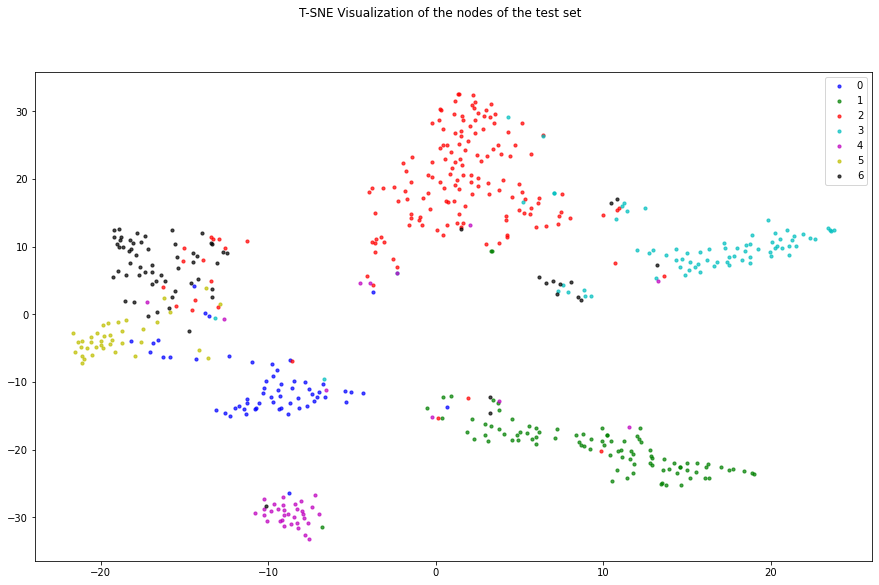

In [48]:
############## Task 13
# Transforms torch tensor to numpy matrix

##################
embeddings_test_np = embeddings_test.detach().cpu().numpy()
##################


# Projects the emerging representations to two dimensions using t-SNE

##################
tsne = TSNE() # default 2 dim
embeddings_test_2d = tsne.fit_transform(embeddings_test_np) 
##################


labels = class_labels[idx_test]
unique_labels = np.unique(labels)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

fig, ax = plt.subplots()
for i in range(unique_labels.size):
    idxs = [j for j in range(labels.size) if labels[j]==unique_labels[i]]
    ax.scatter(embeddings_test_2d[idxs,0], 
               embeddings_test_2d[idxs,1], 
               c=colors[i],
               label=i,
               alpha=0.7,
               s=10)

ax.legend(scatterpoints=1)
fig.suptitle('T-SNE Visualization of the nodes of the test set',fontsize=12)
fig.set_size_inches(15,9)
plt.show()